In [8]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import datetime


In [ ]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt

folder_path = "G:\\My Drive\\Riyadh-Data-set"

for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):  
        file_path = os.path.join(folder_path, filename)
        
        dataset = gdal.Open(file_path)
        
        if dataset is None:
            print(f"Failed to open file {filename}")
            continue
        
        band = dataset.GetRasterBand(1)  
        arr = band.ReadAsArray()
        
        # Plotting the band
        plt.figure(figsize=(10, 10))
        plt.imshow(arr, cmap='gray')
        plt.title(f'{filename} - Band 4')
        plt.show()

        # Close the dataset
        dataset = None

In [4]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt

folder_path = 'C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-data'

for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        file_path = os.path.join(folder_path, filename)
        
        dataset = gdal.Open(file_path)
        
        if dataset is None:
            print(f"Failed to open file {filename}")
            continue
        
        band = dataset.GetRasterBand(1)  # Assuming NDVI is in the first band
        array = band.ReadAsArray()
        
        # Initialize cluster counts for this image
        cluster_counts = [0, 0]
        
        # Loop over each pixel in the NDVI array
        for row in range(array.shape[0]):
            for col in range(array.shape[1]):
                value = array[row, col]
                # Increment the appropriate counter based on the NDVI value
                if value > 0.22:
                    cluster_counts[0] += 1
                else:
                    cluster_counts[1] += 1
        
        # Calculate the total number of pixels
        total_pixels = sum(cluster_counts)
        
        # Calculate the percentage for each cluster
        cluster_percentages = [count / total_pixels * 100 for count in cluster_counts]
        

        
        # Display the cluster counts and percentages for this image
        print(f"Cluster counts for {filename}: {cluster_counts}")
        print(f"Cluster percentages for {filename}: [{cluster_percentages[0]:.2f}%, {cluster_percentages[1]:.2f}%]")
        
        # Close the dataset
        dataset = None


Cluster counts for NDVI_RUH-B4-B8_2018-12-15.tif: [1080758, 39812767]
Cluster percentages for NDVI_RUH-B4-B8_2018-12-15.tif: [2.64%, 97.36%]
Cluster counts for NDVI_RUH-B4-B8_2019-01-14.tif: [963125, 39930400]
Cluster percentages for NDVI_RUH-B4-B8_2019-01-14.tif: [2.36%, 97.64%]
Cluster counts for NDVI_RUH-B4-B8_2019-02-13.tif: [1088076, 39805449]
Cluster percentages for NDVI_RUH-B4-B8_2019-02-13.tif: [2.66%, 97.34%]
Cluster counts for NDVI_RUH-B4-B8_2019-03-15.tif: [743519, 40150006]
Cluster percentages for NDVI_RUH-B4-B8_2019-03-15.tif: [1.82%, 98.18%]
Cluster counts for NDVI_RUH-B4-B8_2019-04-14.tif: [661097, 40232428]
Cluster percentages for NDVI_RUH-B4-B8_2019-04-14.tif: [1.62%, 98.38%]
Cluster counts for NDVI_RUH-B4-B8_2019-05-14.tif: [752462, 40141063]
Cluster percentages for NDVI_RUH-B4-B8_2019-05-14.tif: [1.84%, 98.16%]
Cluster counts for NDVI_RUH-B4-B8_2019-06-13.tif: [694817, 40198708]
Cluster percentages for NDVI_RUH-B4-B8_2019-06-13.tif: [1.70%, 98.30%]
Cluster counts for

KeyboardInterrupt: 

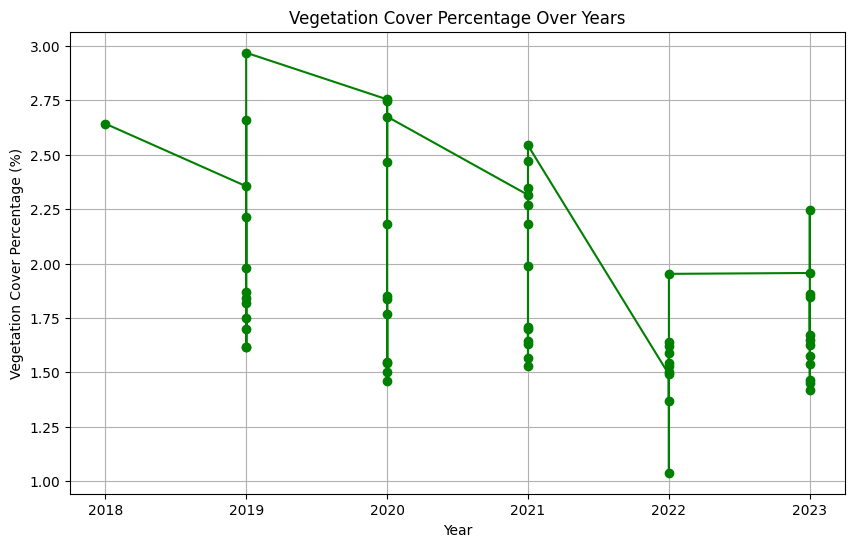

In [5]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import re  # For extracting the year from filenames

folder_path = 'C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-data'

# Initialize lists to store years and vegetation cover percentages
years = []
vegetation_cover_percentages = []

for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        file_path = os.path.join(folder_path, filename)
        
        dataset = gdal.Open(file_path)
        
        if dataset is None:
            print(f"Failed to open file {filename}")
            continue
        
        band = dataset.GetRasterBand(1)  # Assuming NDVI is in the first band
        array = band.ReadAsArray()
        
        # Initialize cluster counts for this image
        cluster_counts = [0, 0]
        
        # Loop over each pixel in the NDVI array
        for row in range(array.shape[0]):
            for col in range(array.shape[1]):
                value = array[row, col]
                # Increment the appropriate counter based on the NDVI value
                if value > 0.22:
                    cluster_counts[0] += 1
        
        # Calculate the total number of pixels
        total_pixels = array.size
        
        # Calculate the percentage of vegetation cover
        vegetation_percentage = cluster_counts[0] / total_pixels * 100
        
        # Extract the year from the filename (adjust the pattern according to your filenames)
        year_extraction = re.search(r'\d{4}', filename)
        if year_extraction:
            year = int(year_extraction.group(0))
            years.append(year)
            vegetation_cover_percentages.append(vegetation_percentage)
        
        # Close the dataset
        dataset = None

# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(years, vegetation_cover_percentages, marker='o', linestyle='-', color='green')

# Format the plot
plt.title('Vegetation Cover Percentage Over Years')
plt.xlabel('Year')
plt.ylabel('Vegetation Cover Percentage (%)')
plt.grid(True)
plt.xticks(sorted(list(set(years))))  # Ensure x-axis has one tick per year, without duplicates
plt.show()


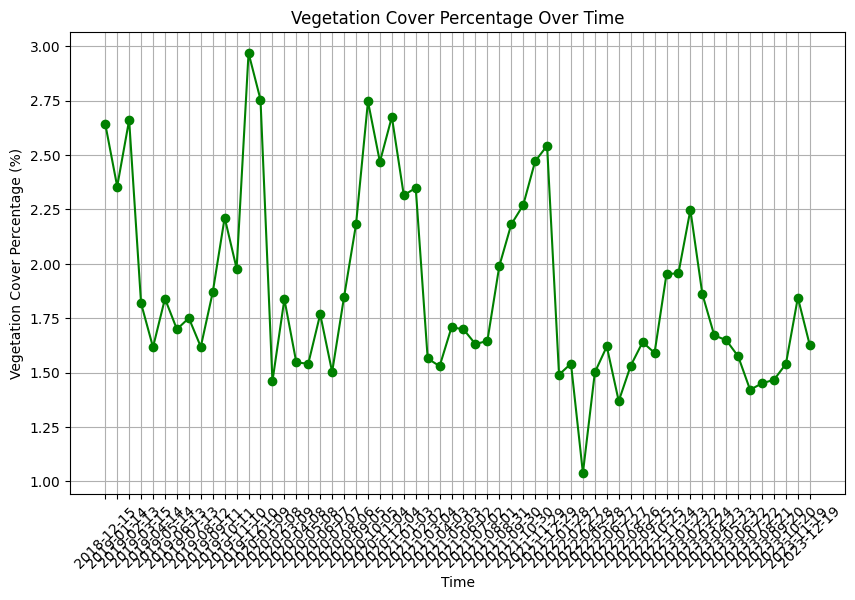

In [11]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

folder_path = 'C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-data'

# Initialize lists to hold the dates and vegetation cover percentages
dates = []
vegetation_cover_percentages = []

for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        file_path = os.path.join(folder_path, filename)
        
        dataset = gdal.Open(file_path)
        
        if dataset is None:
            print(f"Failed to open file {filename}")
            continue
        
        band = dataset.GetRasterBand(1)  # Assuming NDVI is in the first band
        array = band.ReadAsArray()
        
        # Initialize cluster count for vegetation
        vegetation_count = 0
        
        # Loop over each pixel in the NDVI array
        for row in range(array.shape[0]):
            for col in range(array.shape[1]):
                value = array[row, col]
                # Increment the vegetation counter based on the NDVI value
                if value > 0.22:
                    vegetation_count += 1
        
        # Calculate the total number of pixels
        total_pixels = array.size
        
        # Calculate the percentage for vegetation cover
        vegetation_percentage = vegetation_count / total_pixels * 100
        
        # Extract the date or unique identifier from the filename
        date_identifier = filename.split('_')[-1].split('.')[0]  # Adjust based on your filename structure
        dates.append(date_identifier)  # Adjust this line if the identifier is a date
        
        vegetation_cover_percentages.append(vegetation_percentage)

# Convert string dates to datetime objects if they are dates
# dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]  # Uncomment if dates are used

# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(dates, vegetation_cover_percentages, marker='o', linestyle='-', color='green')

# Format the plot
plt.title('Vegetation Cover Percentage Over Time')
plt.xlabel('Time' if not dates[0].isdigit() else 'Year')  # Adjust label based on whether dates or identifiers are used
plt.ylabel('Vegetation Cover Percentage (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


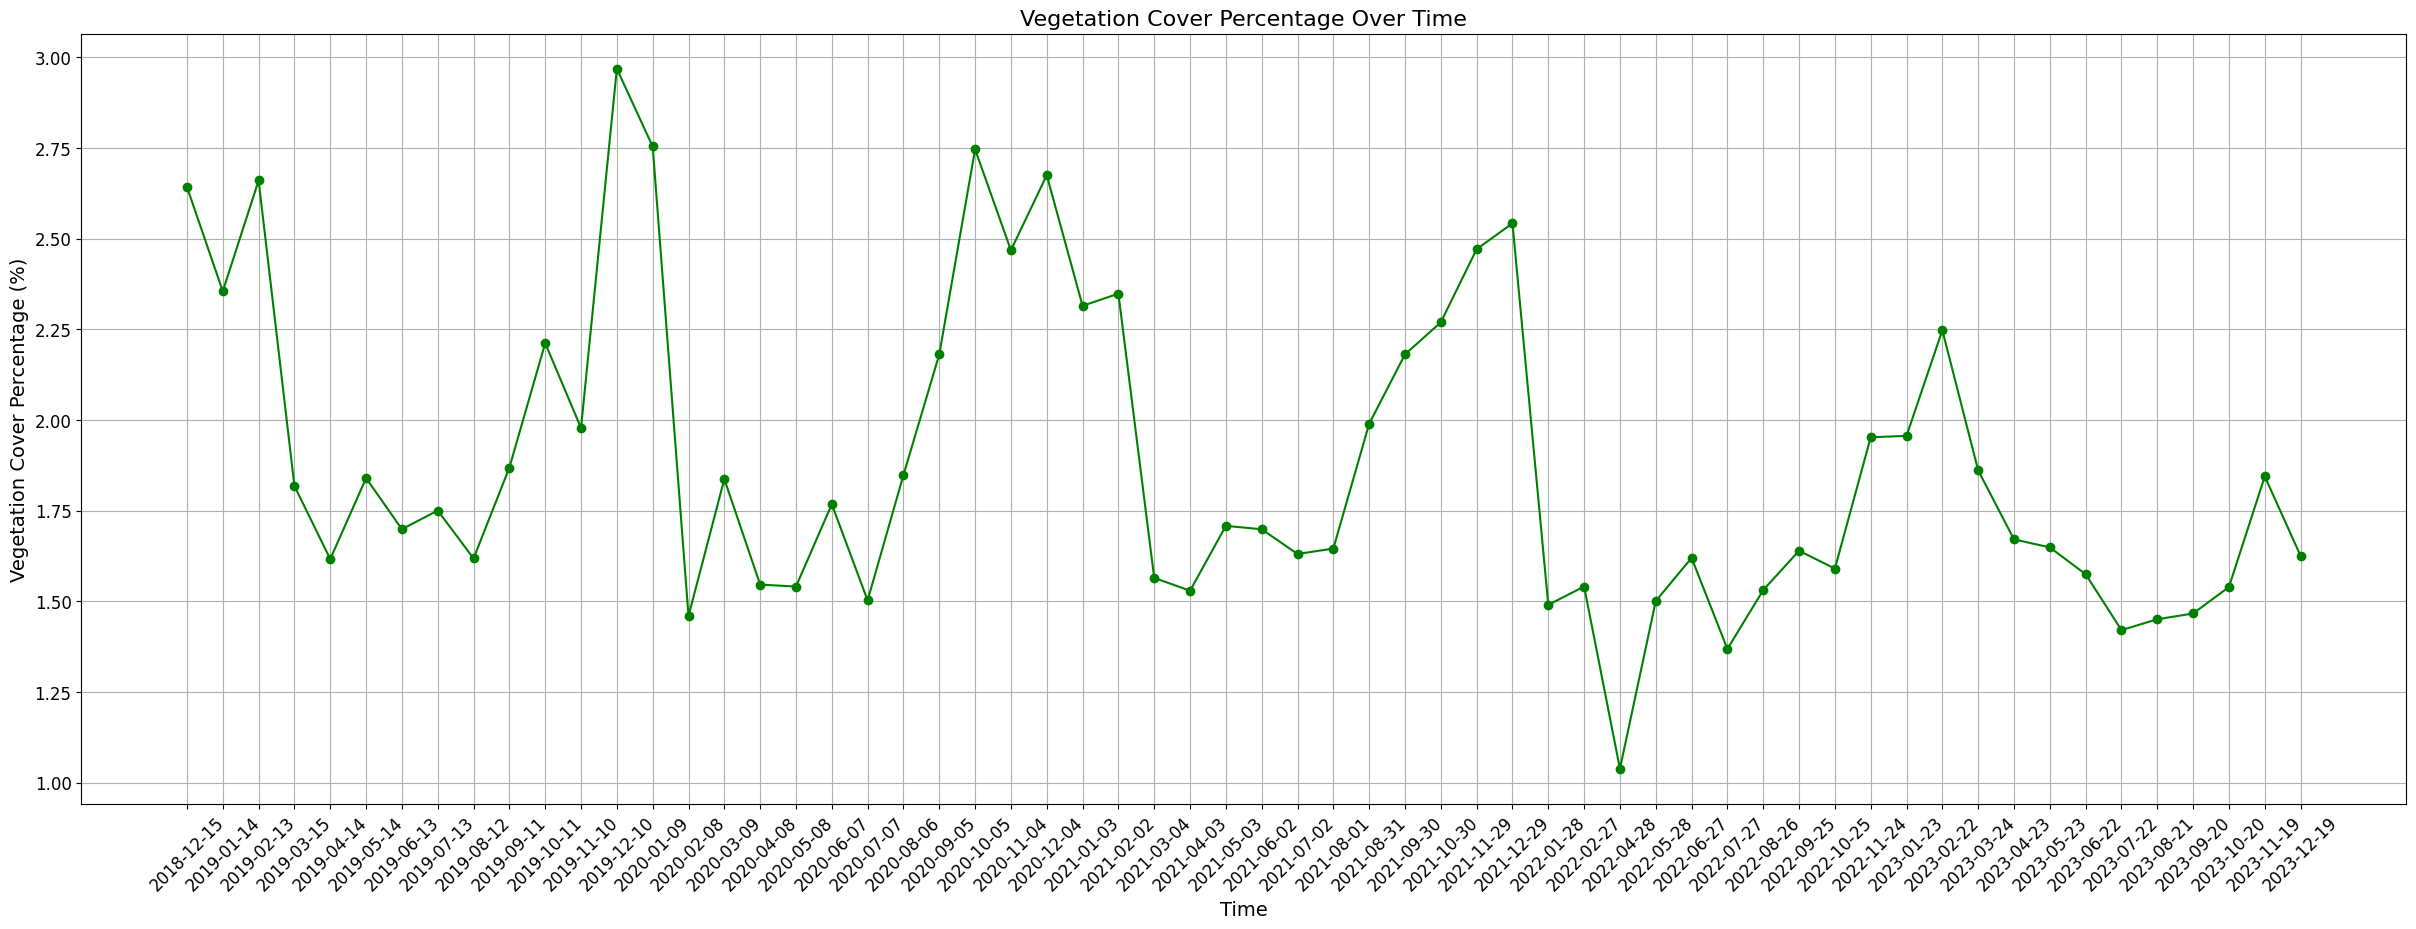

In [14]:
# Plot the time series line chart with a larger size
plt.figure(figsize=(30, 10))  # Increase the figure size
plt.plot(dates, vegetation_cover_percentages, marker='o', linestyle='-', color='green')

# Format the plot
plt.title('Vegetation Cover Percentage Over Time', fontsize=16)  # You can also adjust font sizes for better readability
plt.xlabel('Time' if not dates[0].isdigit() else 'Year', fontsize=14)  # Adjust label based on whether dates or identifiers are used
plt.ylabel('Vegetation Cover Percentage (%)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()
